# Statistiques descriptives unidimensionnelles

Notre but est de traiter de données statistiques unidimensionnelles, pour lesquelles il faudra déterminer des indicateurs élémentaires (moyenne, écart type, médiane, ...) et donner des représentations graphiques comme par exemple des camemberts, des histogrammes, et des boîtes à moustaches). 

L’objectif des exercices proposés est d’apporter une première compréhension de l’information véhiculée par les données à travers ces indicateurs et représentations.

## 1 - **Lancés d’un dé**

On commence par une expérience de lancé d'un Dé, on va représenter par un camembert la répartition des
valeurs prises par un dé lancé n fois. 

In [23]:
%matplotlib inline
from IPython.display import display, Math

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.stats 


plt.rcParams['font.size'] = 18             # parametrage par defaut : taille de texte
plt.rcParams['figure.figsize'] = (18, 10)  # parametrage par defaut : taille de figures
np.set_printoptions(precision=3,formatter={'float': '{: 0.3f}'.format})

In [2]:
lesValeursDeN = [10, 20, 50, 100, 500, 2000] # les valeurs de nombres de lances
lesValeursDeN_label = [str(i) for i in lesValeursDeN] # labelisation nombre de lances
etiquettes = ['face '+str(i) for i in range(1, 7)]   # labelisation des faces 

In [3]:
print("etiquettes : ",etiquettes)

etiquettes :  ['face 1', 'face 2', 'face 3', 'face 4', 'face 5', 'face 6']


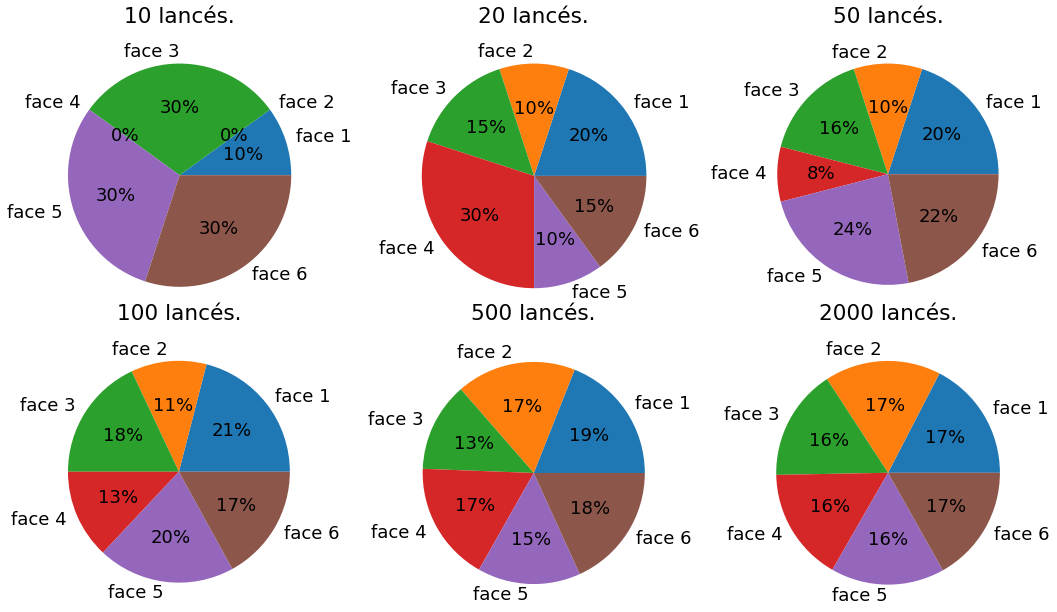

In [10]:
# pour la mise en forme des cambembert 
nbC = np.ceil(np.sqrt(len(lesValeursDeN)))  # nombre de colonnes
nbL = np.ceil(len(lesValeursDeN)/nbC)       # nombre de lignes

mini  = []   # la proportion minimimal de la distribution 
maxi  = []   # la proportion max de la distribution 
ecartType = []  #  l'EC 
moyenne = []    #  la moyenne

for i, n in enumerate(lesValeursDeN):
    plt.subplot(nbL, nbC, i+1)
    
    # generation d'une experience de n nombre d'essai 
    X = np.random.randint(1,7,size=(1,n)) 
    
    bins,edges=np.histogram(X,bins=np.arange(1,8),density=1)
    
    mini.append(min(bins))
    maxi.append(max(bins))
    ecartType.append(np.std(bins))
    moyenne.append(np.mean(X))
    
    plt.pie(bins,labels=etiquettes, autopct='%1.0f%%')
    plt.title('{} lancés.\n'.format(n))
    plt.axis('equal')

on constate bien que lorsque le nombre de lancés augmente l'ecart-type entre les proportions des faces converge vers 0 ce qui montre que cette expérience converge vers une loi unifome de ratio = 1/6 .

Et de représenter ces informations sur une même figure que vous devrez commenter (aussi en
liaison avec les camemberts)

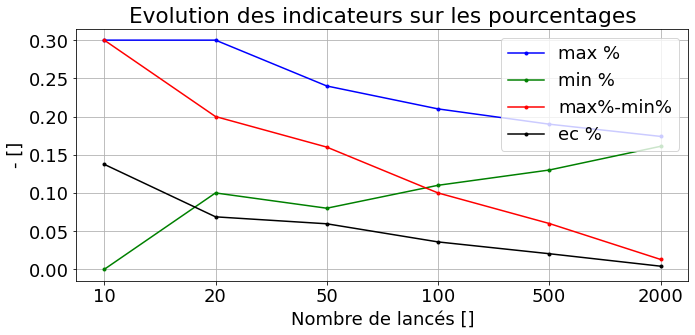

In [13]:
plt.figure(figsize=(10,5))
plt.plot(maxi,'.-b',label='max %')
plt.plot(mini,'.-g',label='min %')
plt.plot(np.array(maxi)-np.array(mini),'.-r',label='max%-min%')
plt.plot(ecartType,'.-k',label='ec %')
plt.title('Evolution des indicateurs sur les pourcentages')
plt.xlabel('Nombre de lancés []')
plt.ylabel('- []')
plt.xticks(np.arange(len(lesValeursDeN)), lesValeursDeN_label)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

## 2 - Théorème Centrale limite

###  Illustration du théorème de la limite centrale (TCL)
Le TCL rappelé dans l’encadré ci-dessous indique que la moyenne d’une suite de variables aléatoires
tend vers une loi normale. Pour illustrer cela vous devrez :

- Simuler p tirages de taille n selon une loi uniforme U(a,b) avec a=3 et b=5. Vous procéderez 
    comme précédemment en faisant bien attention de prendre en compte le paramètre 
    supplémentaire pour le nombre p de tirages.
- Calculer pour chaque tirage sa moyenne empirique ($\bar{X}$), et représenter l’histogramme 
    normalisé (ainsi que les fonctions de densité empirique et théorique) des $p$ moyennes 
    obtenues, elles suivent une loi $\mathcal{N}(\mu,\sigma^2/n)$. 
    On rappelle qu’une loi uniforme $\mathcal{U}(a,b)$ a une densité de probabilité d’espérance
    $\mu =(a+b)/2$ et de variance $\sigma^2 =(b-a)^2 /12$ .

Vous devrez utiliser les valeurs suivantes : pour p : p=10 et p=200, pour n : n=5 ; n=50 et
n=500 ce qui représente 6 cas différents.  
Qu’observez vous lorsque n augmente selon les valeurs de p ?

In [14]:
# fonction d'affichage
def tracerUnHistogrammeDeMoyennesEtUnPeuPlus(n,p,rvObj,loc=0,scale=1,display_hist=True,display_pdf=True):
    # generation des donnees
    X = rvObj.rvs(loc,scale,size=(n,p))
    
    # generation des X_bar (moyennes empiriques)
    X_bar = np.mean(X,axis=0)
    
    # parametres empiriques de la loi des X_bar
    mu_em = np.mean(X_bar)
    sigma_em = np.std(X_bar)
    
    # parametres theoriques de la loi des X_bar
    if rvObj== scipy.stats.norm:
        mu_th = loc;
        sigma_th = scale/math.sqrt(n)
    elif rvObj == scipy.stats.uniform:
        mu_th = loc+scale/2;
        sigma_th = scale/math.sqrt(12*n)
    else:
        raise ValueError("Unexpectd random value")
        
    # realisation de l'histogramme des X_bar
    if display_hist==True:
        n, binEdges, patches = plt.hist(X_bar,10,density=1,label='histogramme',alpha=.25)
        xlim = plt.xlim()
    elif display_pdf==True:
        n, binEdges = np.histogram(X_bar,10)
        xlim = [.9*X_bar.min()+.1*X_bar.max(), 1.1*X_bar.max()-.1*X_bar.max()]
    
    # tracer des pdf des X_bar
    if display_pdf==True:
        x_lim = np.linspace(xlim[0], xlim[1], num=100)
        plt.plot(x_lim,scipy.stats.norm.pdf(x_lim,mu_th,sigma_th),'-',color='red',linewidth=6,alpha=.5,label='pdf theorique')
        plt.plot(x_lim,scipy.stats.norm.pdf(x_lim,mu_em,sigma_em),'k--',color='black',label='pdf empirique')
        #plt.legend()
    if display_hist==True or display_pdf==True:
        plt.grid(True)

    return mu_em,sigma_em

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

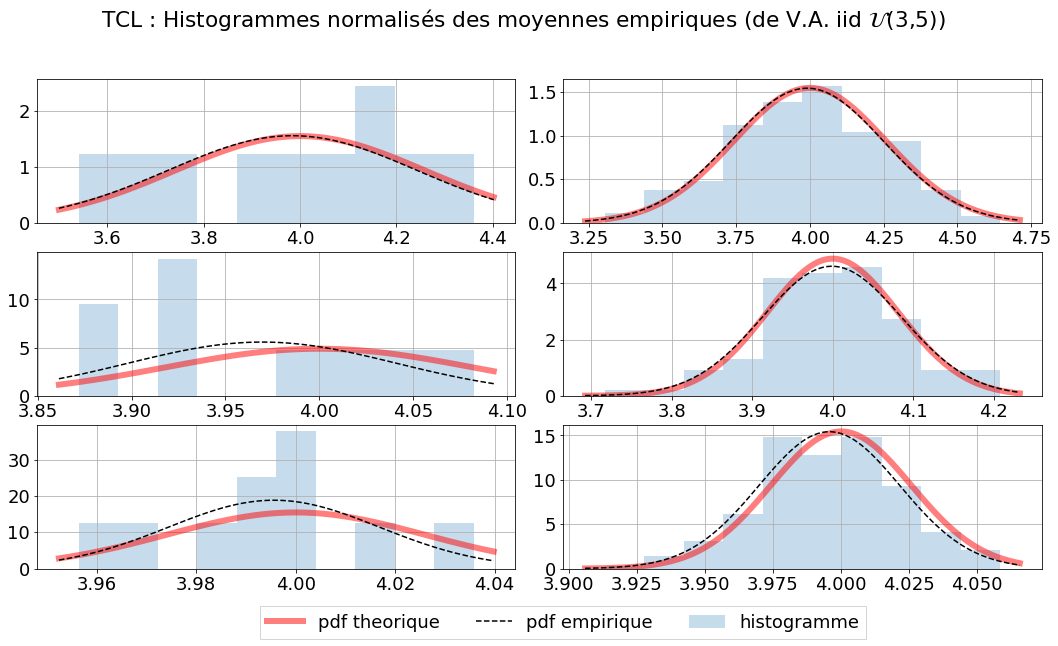

In [27]:
valeursDeN = [5, 50, 500]
nbDeN = len(valeursDeN)
valeursDeP = [10, 200]
nbDeP = len(valeursDeP)

# parametres de la loi des X
a = 3 ; b = 5
display(Math("$\\text{{loi uniforme de paramètres : }}a = {}\\text{{ et }}b = {}$".format(a,b)))
mu_X_th = (a+b)/2
sigma_X_th = (b-a)/math.sqrt(12)
display(Math("$\\text{{espérance et écart-types théoriques : }}\\hat{{\\mu}} = {:.2}\\text{{ et }}\\hat{{\\sigma}} = {:.2}$".format(mu_X_th,sigma_X_th)))

mu_em = np.zeros((nbDeN,nbDeP))
sigma_em = np.zeros((nbDeN,nbDeP))
fig = plt.figure()
for i, n in enumerate(valeursDeN):
    for j, p in enumerate(valeursDeP):
        plt.subplot(nbDeN,nbDeP,i*nbDeP+j+1)
        mu_em[i,j], sigma_em[i,j] = tracerUnHistogrammeDeMoyennesEtUnPeuPlus(n,p,scipy.stats.uniform,a,b-a)
        display(Math("$\\text{{espérance et écart-types estimés (n:{:3},p:{:3}): }}\\hat{{\\mu}} = {:.2}\\text{{ et }}\\hat{{\\sigma}} = {:.2}$".format(n,p,mu_em[i,j],sigma_em[i,j])))
fig.suptitle('TCL : Histogrammes normalisés des moyennes empiriques (de V.A. iid $\mathcal{{U}}$({},{}))'.format(a,b));
fig.subplots_adjust(bottom=0.2, wspace=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0., -0.2),fancybox=False, shadow=False, ncol=3);